## 1. Загрузка библиотек и файлов.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)

In [2]:
try:
    data = pd.read_csv('D:\\Катя\\Яндекс практикум\\Сборный проект\\games.csv')
except:
    print('Error')

**Загружены необходимые для работы библиотеки, а также исторические данные о продажах компьютерных игр (с учётом оценок пользователей и экспертов, жанров, платформ) по открытым источникам с 1980г. по 2016 год.**

## 2. Краткий обзор данных.

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Данные загружены в объёме 11 столбцов и 16715 строк, а именно:**

- ***Name - наименование игры,***
- ***Platform - игровая платформа,***
- ***Year_of_Release - год выпуска игры,***
- ***Genre - жанр игры,***
- ***NA_sales - продажи в регионе North America,***
- ***EU_sales -  продажи в Европе,***
- ***JP_sales - продажи в Японии,***
- ***Other_sales - продажи в других регионах,***
- ***Critic_Score - оценки критиков,***
- ***User_Score - оценки пользователей,***
- ***Rating - рейтинг.*** 

**Формальный просмотр данных говорит о необходимости предобработки - имеются пропущенные значения, а также потребность изменить тип данных в некоторых ячейках для дальнейшего анализа. Кроме того, необходимо проверить данные на явные и неявные дубликаты, какие-либо ошибки. Эти действия представлены в разделе ниже, в "Предобработке данных".**

## 3. Предобработка данных.

### 3.1. Корректировка названия столбцов.

In [5]:
data.columns = ['name', 'platform', 'year_of_release', 'genre', 'NA_sales', 'EU_sales', 'JP_sales', 'other_sales',  \
               'critic_score', 'user_score', 'rating']

**Наименование столбцов приведены к нижнему регистру. Столбцы с названиями регионов оставлены без изменения.**

### 3.2. Обработка пропусков и преобразование данных в нужные типы (при необходимости).

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**В данных имеются пропуски в 6 столбцах: "name" и "genre" - по 2 пропуска (из 16715 строк); в столбце "year_of_release" 269 пропусков, что составляет 1,6% от объёма данных; в столбце "critic_score" имеется 8461 пропуск, в столбце "user_score" 6605 пропусков, в "rating" - 6676, что составляет, соответственно, 51%, 40% и 40,5% от объёма данных.**

**Возможные причины пропусков в столбцах name /genre /year_of_release - человеческий фактор (как следствие - неправильное заполнение данных), технический сбой при сохранении данных. В столбцах user_score /critic_score /rating также могут иметь место данные факторы, но вероятнее всего (поскольку пропуски составляют очень существенную часть данных) - игры с пропусками в этих столбцах просто не были оценены критиками/пользователями и не имеют рейтинга. Возможно часть пропусков в этих столбцах приходится на старые игры, выпущенные до 2000-х годов. Возможно это связано с тем, что как в дальнейшем покажет анализ - в столбце rating отражены только рейтинги ESRB, и вероятно игры, оцененные другими агентствами, получили пропуски в указанных столбцах.**
   
**Рассмотрим подробнее каждый столбец с пропусками, и примем решение о необходимой обработке данных пропусков.**

In [7]:
# пропуски в столбце name
data.query('name.isna()')

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Предлагается удалить данные 2 строки с пропусками в столбцах "name" и "genre" - во-первых, это не окажет влияния на ход исследования, т.к. удаляется всего 2 строки из 16 тысяч. И, во-вторых, данные строки не очень информативны для нашего исследования (объект - 2 игры 1993 года без названия, жанра, оценок критиков и пользователей, без рейтинга).**

In [8]:
data.shape

(16715, 11)

In [9]:
# сохранение удаляемых значений в отдельный датафрейм
data_isna = data.query('name.isna()')

In [10]:
# удаление пропусков в столбце name
data = data.dropna(subset=['name'])

In [11]:
data.shape

(16713, 11)

In [12]:
# пропуски в столбце year_of_release
data.query('year_of_release.isna()')

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.00,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.00,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.00,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Пропуски в столбце "year_of_release", вероятно, вызваны техническим сбоем при заполнении данных. Пропуски присутствуют в строках как с играми на старых платформах, которые уже покинули рынок, так и в строках с играми на современных платформах. В некоторых строках заполнены данные всех столбцов, кроме столбца "year_of_release", в некоторых строках имеются пропуски не только в "year_of_release", но и в столбцах с оценками критиков и пользователей, в столбце в рейтингом.**

**В столбце "year_of_release" 269 пропусков, что составляет 1,6% от числа строк. Предлагается удалить данные пропуски, т.к. год выпуска игры необходим для анализа, а пропущенных данных менее 5%, что не скажется на исследовании. В любом случае, в дальнейшем для целей исследования будут использоваться данные для актуального периода, и указанные строки не попадут в срез данных и не будут использованы в работе.**
 
**После обработки пропусков следует преобразовать столбец "year_of_release" от типа float к типу int (т.к. время - год выражается как натуральное число).**

In [13]:
# сохранение удаляемых значений в отдельный датафрейм
data_isna = data_isna.append(data.query('year_of_release.isna()'), ignore_index=True)

In [14]:
# удаление пропусков в столбце  year_of_release
data = data.dropna(subset=['year_of_release'])

In [15]:
data.shape

(16444, 11)

In [16]:
# приведение столбца  year_of_release к типу int
data['year_of_release'] = data['year_of_release'].astype(int)

In [17]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

**С необработанными пропусками остались 3 столбца. О возможных причинах возникновения пропусков в данных столбцах было указано выше. В столбце "critic_score" 8461 пропуск, в столбце "user_score" 6605 пропусков. Это очень существенная часть данных. Удаление такого объёма данных, в принципе, не подразумевается. Думается, что обработка пропусков в виде их заполнения средним/медианным значением окажет влияние на результаты исследования и может исказить их. Пропуски в столбцах с оценками критиков и пользователей предлагается оставить без изменения.**

In [18]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [19]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**В столбце "user_score" имеется значение "tbd". Вероятно, данное значение означает "to be determined" - "будет определено", т.е. можно сделать вывод о том, что игры с данным значением не имеют оценки пользователей. Заменим данные значения на "999". Далее, преобразуем данные столбца "user_score" от типа object к типу float (вероятно, далее в исследовании потребуется работа с данными этого столбца; приведём столбец "user_score" к такому же типу данных как столбец "critic_score"). Затем, вернём значения "999" к Nan.**

In [20]:
# установление заглушки на tbd
data.loc[data['user_score'] == 'tbd', 'user_score'] = '999'

In [21]:
# преобразование столбца user_score к типу данных float
data['user_score'] = data['user_score'].astype(float)

In [22]:
# преобразование заглушки к типу данных NaN
data.loc[data['user_score'] == 999.0, 'user_score'] = np.NaN

**Изучим уникальные значения столбца "rating".**

In [23]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Далее в исследовании потребуется работа со столбцом "rating", в частности, изучение влияния рейтинга на продажи в различных регионах, изучение долей рынка в зависимости от рейтинга. Поэтому предлагается заполнить пропуски строкой "NO rating".**

In [24]:
# заполнение пропусков в столбце rating
data['rating'] = data['rating'].fillna('NO rating')

**Пропуски обработаны (где возможно), данные приведены к необходимым типам данных.**

### 3.3. Проверка на дубликаты (явные и неявные).

In [25]:
data.duplicated().sum()

0

**Явные дубликаты не обнаружены.**

**Осуществим поиск неявных дубликатов по совпадению значений в столбцах name, platform, year_of_release.**

In [26]:
data.duplicated(['name', 'platform', 'year_of_release']).unique()

array([False,  True])

In [27]:
rows_dupl = data[data.duplicated(['name', 'platform', 'year_of_release'])]
rows_dupl

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.00,5.50,E


In [28]:
data.query('name == "Madden NFL 13" and platform =="PS3"')

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.00,5.50,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.00,5.50,E


**Строку с индексом 16230 можно посчитать за неявный дубликат. Предлагается удалить её.**

In [29]:
data.shape

(16444, 11)

In [30]:
# удаление неявного дубликата
data.drop(index=[16230], axis=0, inplace=True)

In [31]:
data.query('name == "Madden NFL 13" and platform =="PS3"')

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.00,5.50,E


In [32]:
data.shape

(16443, 11)

**Явные дубликаты не обнаружены. Неявный дубликат в кол-ве 1 шт. удалён из таблицы.**

### 3.4. Подсчёт суммарных продаж во всех регионах и их запись в отдельный столбец.

In [33]:
data['total_sales'] = data['NA_sales'] + data['EU_sales'] + data['JP_sales'] + data['other_sales']

**В разделе "Предобработка данных" осуществлено первичное изучение данных. Обработаны пропуски там, где возможно: удалены строки с пропусками в столбцах "name", "genre", "year_of_release"; в столбце "rating" пропуски заменены на строку "NO rating"; в столбцах "critic_score" и "user_score" пропуски оставлены без изменения. Изменены типы данных в необходимых столбцах, а также осуществлена проверка на явные и неявные дубликаты. Явных дубликатов не обнаружено, неявные обработаны - удалена 1 строка. Также к правильному стилевому оформлению приведены наименования столбцов, добавлены необходимые столбцы для предстоящих расчётов (общие суммарные продажи для всех регионов).**

## 4. Исследовательский анализ данных.

### 4.1. Исследование количества выпуска игр за разные годы.

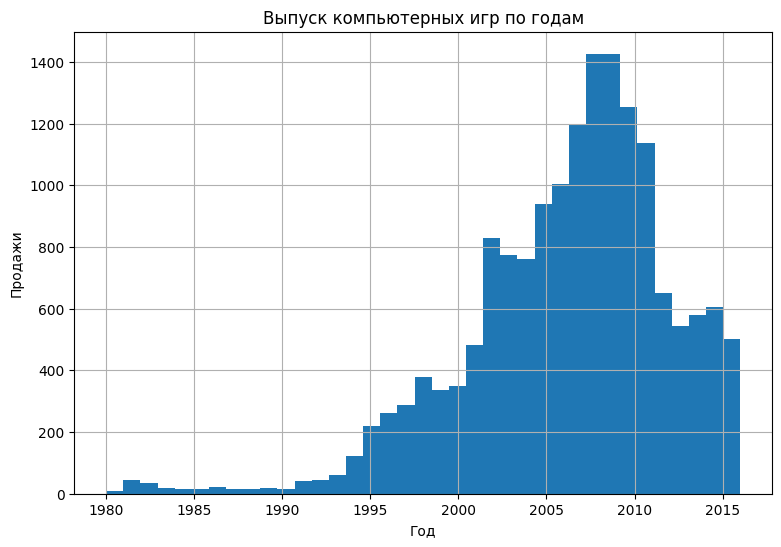

In [34]:
data['year_of_release'].hist(bins=37, figsize=(9,6))
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.title('Выпуск компьютерных игр по годам')
plt.show();

**Исходя из графика можно сделать вывод о том, что развитие компьютерных игр пришлось на 90-е годы. Постепенное начало развития отрасли пришлось на 1994 год, далее в ~ 2001 году можно отметить некоторый скачок в выпуске компьютерных игр, пик пришёлся на 2007-2008 годы (чуть более 1400 выпущенных игр). Затем, начался постепенный спад. С ~ 2011 по 2013 год можно отметить резкое снижение выпуска компьютерных игр. В 2016 году (неполные данные) выпуск составил порядка 500 игр.**

**Очевидно, что для проведения исследования по прогнозированию на предстоящий год вероятных успешных игр не потребуется весь временной отрезок с 1980-х годов, т.к. за всё время сущестовования отрасль компиютерных игр претерпела огромные изменения благодаря технологическому развитию.**

**Исходя из информации, публикуемой в открытых источниках, можно сделать вывод о том, что сфера компьютерных игр переживает застой.**
 
**[Одно из описаний периода развития игр 2008-2012 годов](https://gabestore.ru/blog/igrovaya-industriya-s-2008-go-po-2012-god):** ***В период с 2008-го по 2012 год игровая индустрия переживал очень интересный этап развития. Компании не боялись экспериментировать, технологии не стояли на месте, игры становились всё больше. Грустно, что сегодня мы живём в эпоху стагнации, в которой по-настоящему удивить способны только колоссальных размеров сделки между компаниями. Остаётся надеяться, что это временные трудности, и совсем скоро нас будет ждать перерождение индустрии, сопровождающееся удивительными играми и появлением инновационных технологий.***
        
**Вероятно, резкий спад в индустрии компьютерных игр в 2012 году можно объяснить кризисом идей. Кроме того, вероятно, что мировой экономический кризис 2008-2013 годов повлиял в том числе и на видеоигровую индустрию.**

### 4.2. Изучение изменения продаж по платформам. Платформы с наибольшими суммарными продажами, распределение по годам. Характерный срок появления новых и исчезание старых платформ.

In [35]:
# продажи в разрезе платформ
data.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending= False)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


**В ТОП-платформ с самыми высокими продажами игр за всё время вошли PS2, X360, PS3, Wii, DS, PS. Посмотрим распредение по годам по продажам для наиболее успешных платформ (рассмотрим игры с реализацией более 200, т.е. ТОП-15 платформ).**

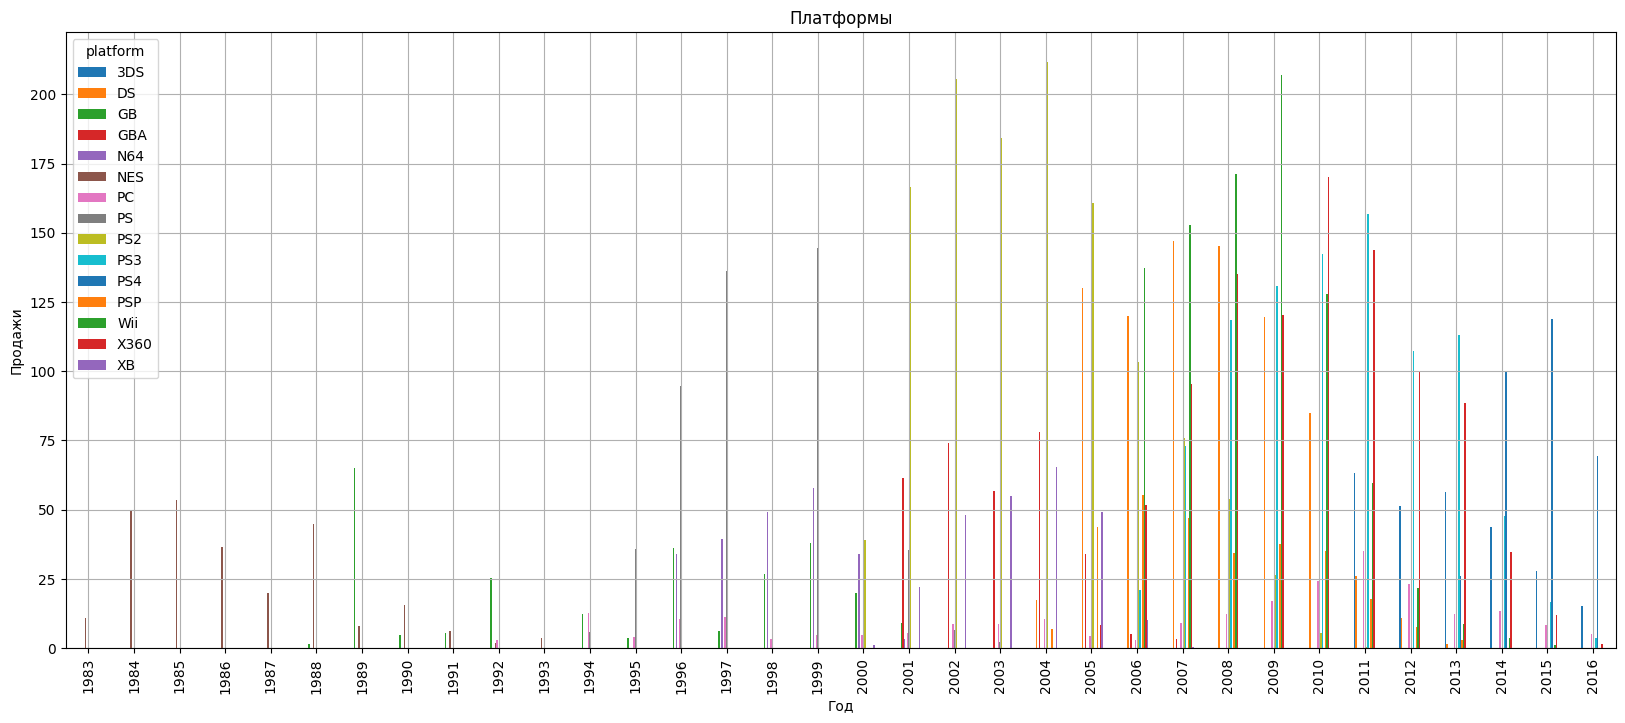

In [36]:
plt_top = data.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending= False).\
          index[:15].tolist()  #исправлено

data.query('platform == @plt_top').pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc ='sum').plot(kind='bar', figsize=(20,8),\
                                                                                           grid=True)

plt.xlabel('Год')
plt.ylabel('Продажи')
plt.title('Платформы')
plt.show()

**Построим графики ТОП-15 платформ по годам и продажам для рассмотрения сроков появления и исчезания платформ.**

**В ходе рассмотрения жизненных циклов ТОП-15 платформ выявлено ошибочное значение для платформы DS - указана игра 1985 года, хотя платформа была выпущена на рынок в 2004 году. Удалим данную ошибочную строку.**

In [37]:
data.shape

(16443, 12)

In [38]:
data.query('platform =="DS" and year_of_release ==1985')

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,NO rating,0.02


In [39]:
data.drop(index=[15957], axis=0, inplace=True)

In [40]:
data.shape

(16442, 12)

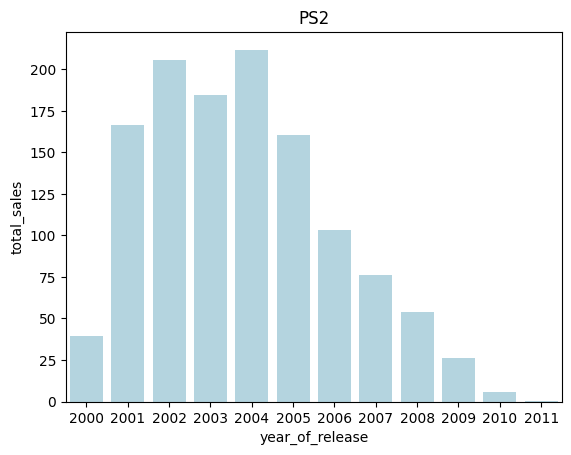

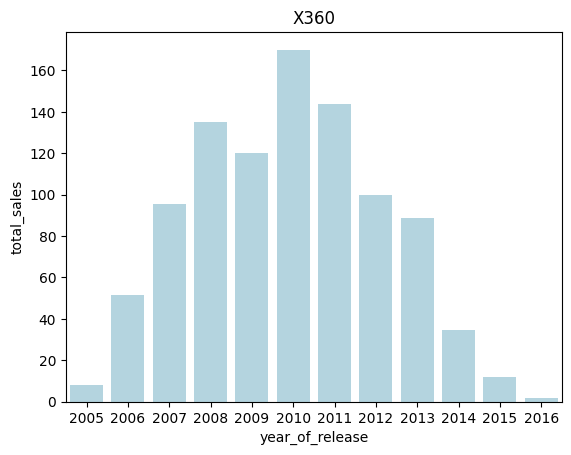

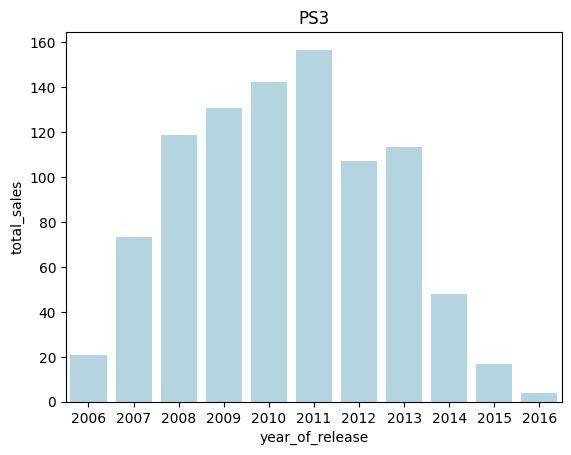

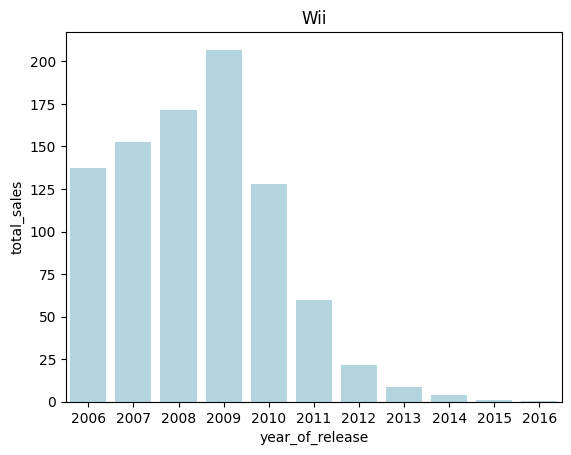

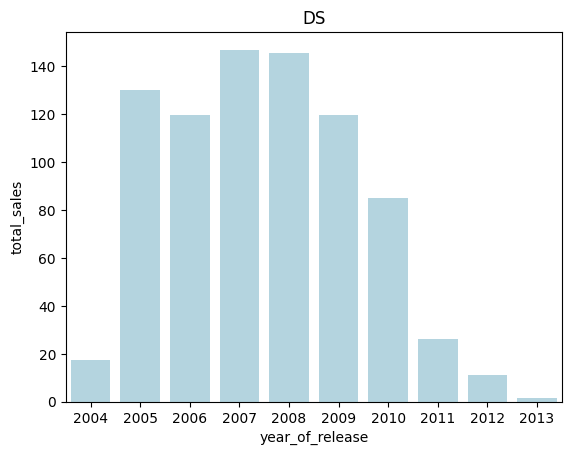

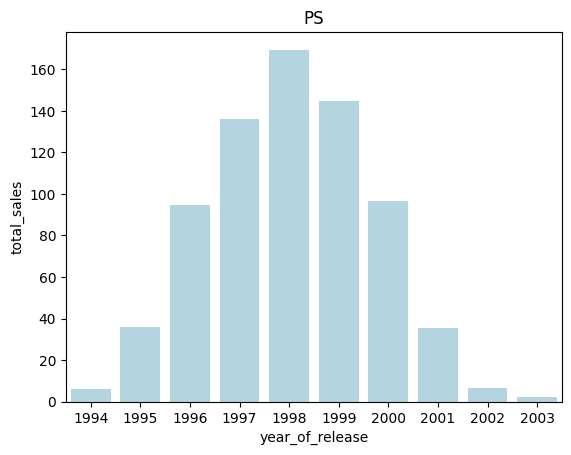

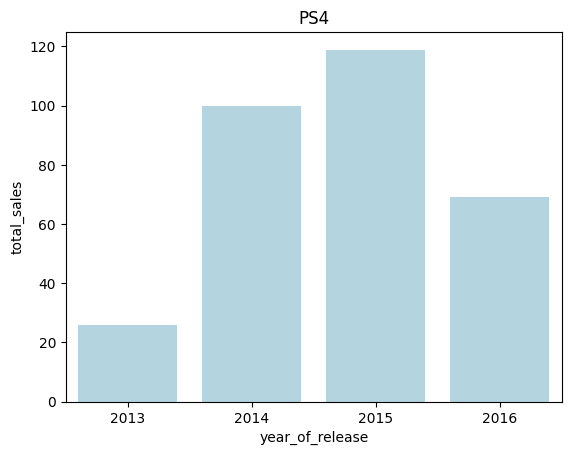

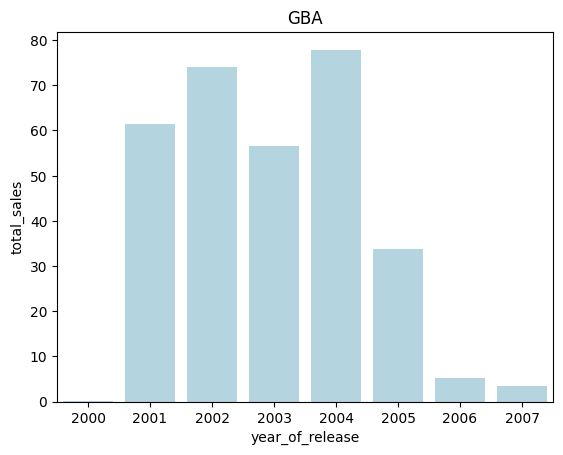

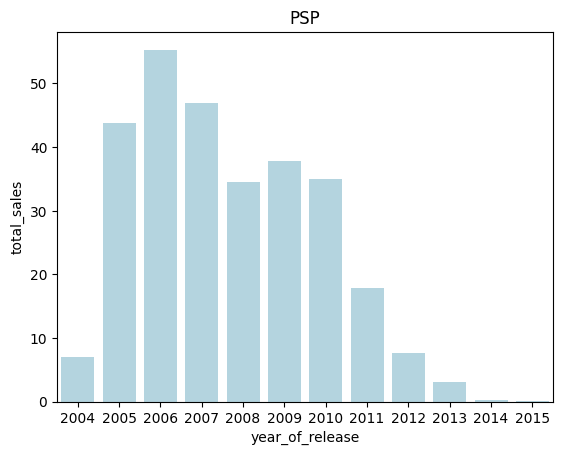

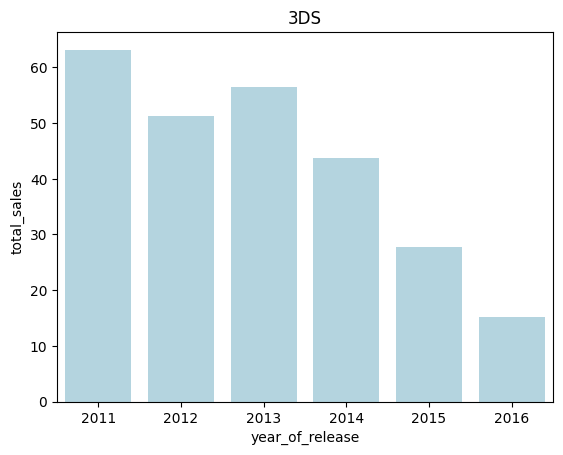

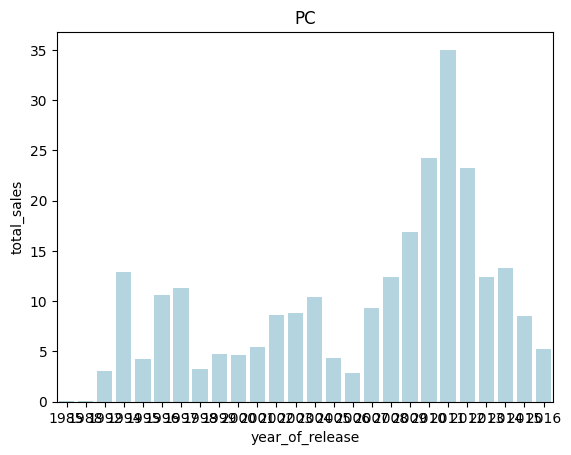

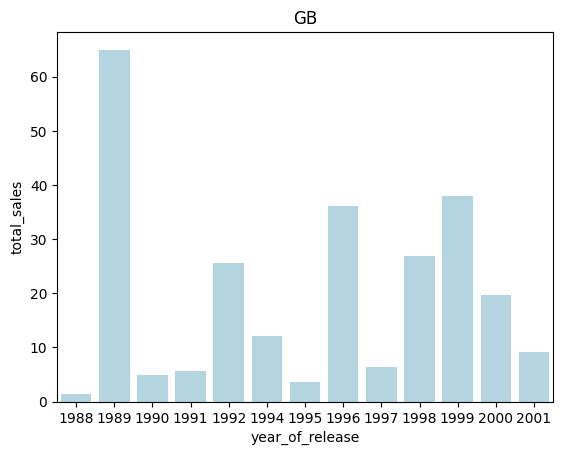

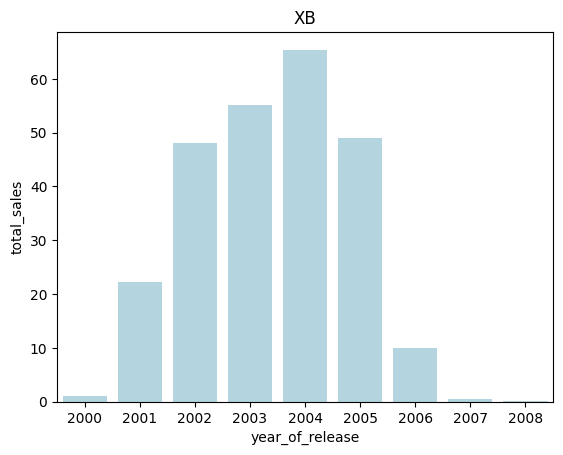

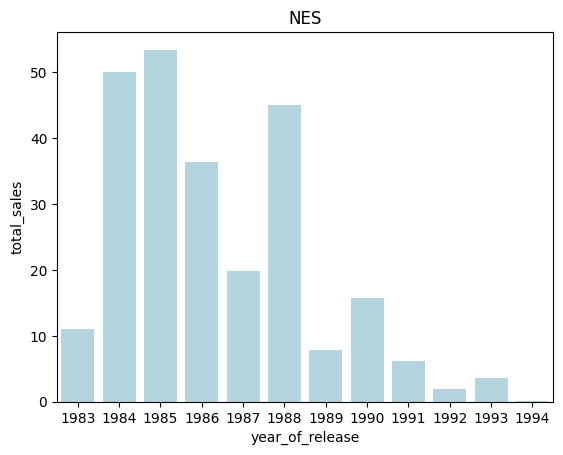

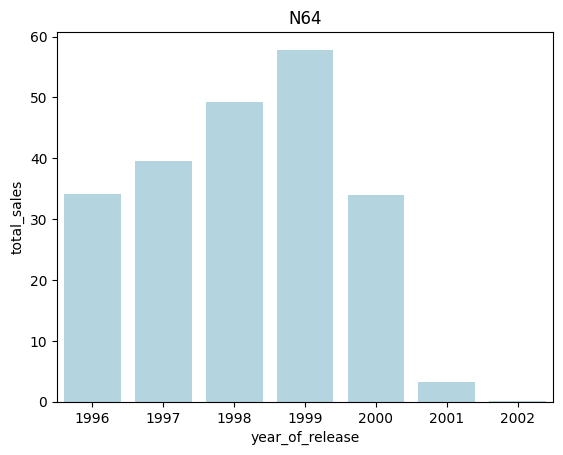

In [41]:
for elem in plt_top:
    data_hist = data.query('platform == @elem').groupby('year_of_release').agg({'total_sales': 'sum'}).reset_index()
    ax = sns.barplot(x='year_of_release', y='total_sales', data=data_hist, palette=['lightblue'])
    ax.set_title(elem)
    plt.show();
    

**Можно сделать вывод о том, что в среднем, большиниство платформ находится на рынке от 10 до 12-13 лет (за некоторым исключением). И за 3-4 года до выхода с рынка наблюдается стабильный спад продаж игр.**

### 4.3. Исследование данных за соответствующий актуальный период (позволяющий построить прогноз на 2017 год). Платформы, лидирующие по продажам. Выбор нескольких потенциально прибыльных платформ.

**Как правило, при бизнес-планировании маркетинговой стратегии используется краткосрочный/среднесрочный период, поэтому рассмотрим данные по платформам за последние 3-4 года (с учётом того, что данные за 2016 год неполные), т.е. с 2012 года (год, с которого началось резкое снижение в выпуске компьютерных игр).**

In [42]:
data_year_pltf = data.groupby(['year_of_release', 'platform']).agg({'total_sales': 'sum'}).sort_values(by=['year_of_release', \
            'total_sales'], ascending = False)
data_year_pltf.query('year_of_release >= 2012')

total_sales
year_of_release platform             
2016            PS4             69.25
                XOne            26.15
                3DS             15.14
                PC               5.25
                WiiU             4.60
                PSV              4.25
                PS3              3.60
                X360             1.52
                Wii              0.18
2015            PS4            118.90
                XOne            60.14
                3DS             27.78
                PS3             16.82
                WiiU            16.35
                X360            11.96
                PC               8.52
                PSV              6.25
                Wii              1.14
                PSP              0.12
2014            PS4            100.00
                XOne            54.07
                PS3             47.76
                3DS             43.76
                X360            34.74
                WiiU            22.03
                PC              13.28
                PSV             11.90
                Wii              3.75
                PSP              0.24
2013            PS3            113.25
                X360            88.58
                3DS             56.57
                PS4             25.99
                WiiU            21.65
                XOne            18.96
                PC              12.38
                PSV             10.59
                Wii              8.59
                PSP              3.14
                DS               1.54
2012            PS3            107.35
                X360            99.74
                3DS             51.36
                PC              23.22
                Wii             21.71
                WiiU            17.56
                PSV             16.19
                DS              11.01
                PSP              7.69

**Как уже отмечалось выше, в ТОП-платформ по суммарным продажам за всё время вошли PS2, X360, PS3, Wii, DS, PS.**

**Более детальное рассмотрение реализации игр по годам в срезе платформ показал интересные особенности.**

**За 2012 год в ТОП-3 платформ входили PS3, X360 и 3DS.**

**В 2013 году ТОП-3 принадлежал этим же платформам. Однако, на рынке появились новые платформы - PS4 и XOne.**

**В 2014 году в ТОП-3 произошли изменения. Очевидно новые платформы вытеснили прежние платформы. Первое место заняла платформа PS4, второе место XOne, далее места заняли PS3, 3DS, X360. Плюс, из списка представленных платформ выбыла DS.**

**В 2015 году в ТОП-3 входят PS4, XOne и 3DS.**

**За неполный 2016 год ТОП-3 сохраняется в том же виде. Плюс, из списка представленных платформ выбыла PSP.**


**ВЫВОД: для исследования (маркетинговое планирование для целей закупки-реализации игр и рекламных компаний) следует иметь ввиду, что отрасль компьютерных игр стремительно развивается и изменяется - появляются новые платформы, заменяющие предшествующие.**

**Поэтому, для целей исследования следует рассматривать конкурентные платформы, находящиеся в рынке, а именно:**
- **PS4, (входит в ТОП-3),**
- **XOne, (входит в ТОП-3),**
- **3DS, (входит в ТОП-3),**
- **PC,**
- **WiiU,**
- **PSV,**
- **PS3,**
- **X360,** 
- **Wii.**

**Актуальный период возьмём с 2014 года, руководствуясь тем, что в 2013 году на рынок вышли новые платформы PS4 и XOne, которые вытеснили в 2014 году старые платформы и вошли в ТОП-3 продаваемых игр. По графикам "жизненного цикла платформ" можно увидеть, что, в большинстве случаев, со второго года выхода на рынок наблюдается стабильный рост и развитие платформы. По сути, наблюдется очередная смена платформ на рынке - старые платформы вытесняются появившимися новыми платформами.**

In [43]:
data_new = data.query('year_of_release >= 2014 and platform != "PSP"').reset_index(drop=True)
data_new

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NO rating,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NO rating,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NO rating,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
1671,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NO rating,0.01
1672,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NO rating,0.01
1673,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NO rating,0.01
1674,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NO rating,0.01


### 4.4. Построение графика "боксплот" по глобальным продажам игр в разбивке по платформам.

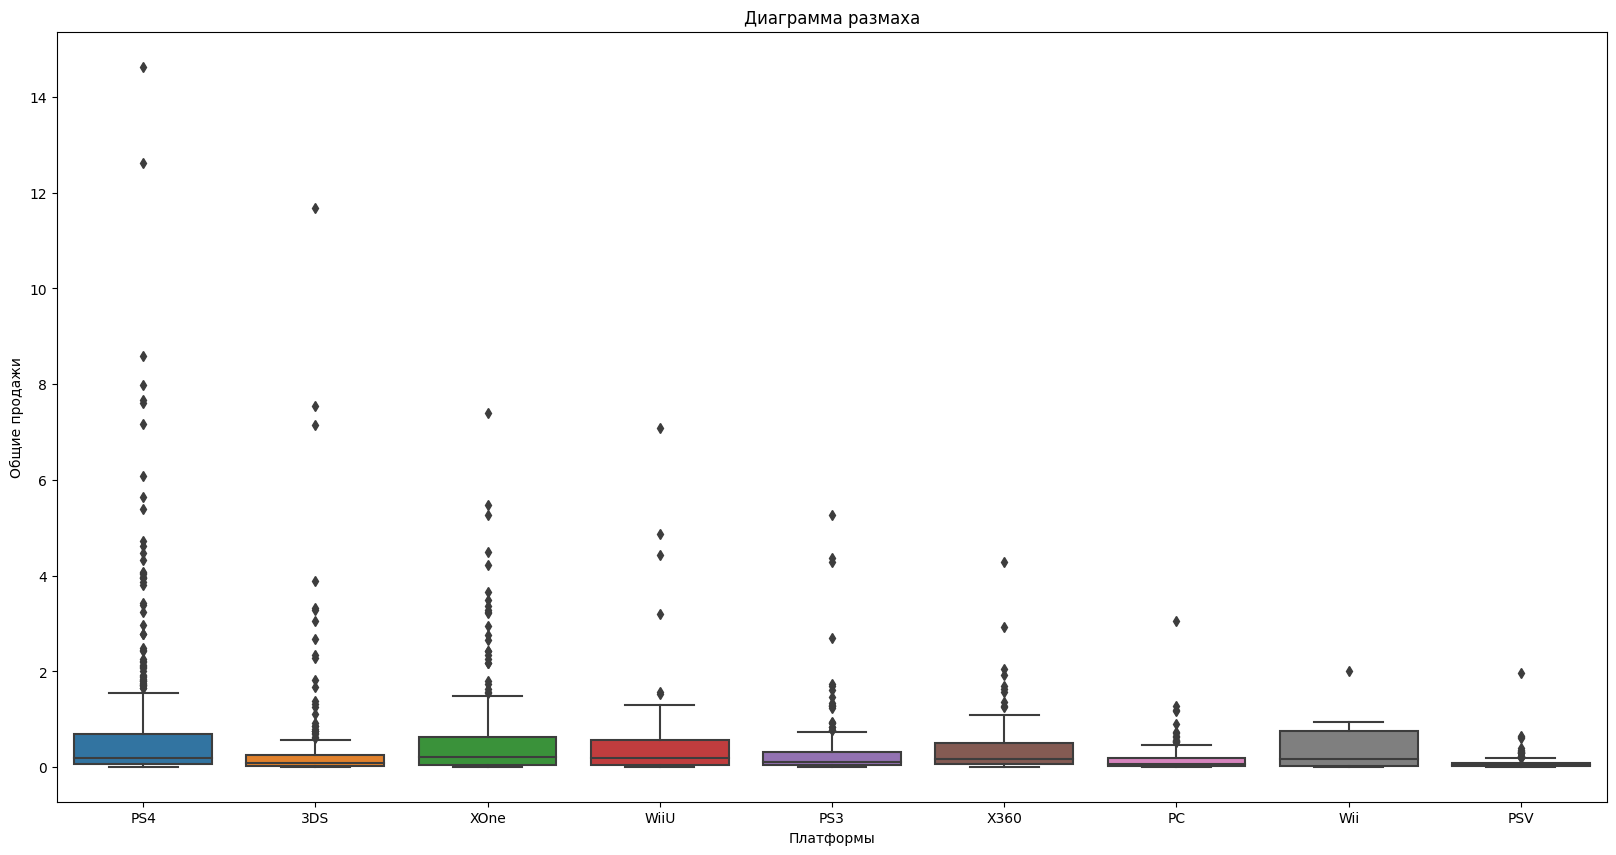

In [44]:
plt.figure(figsize=(20, 10))
box = sns.boxplot(x='platform', y='total_sales', data=data_new).set(title = 'Диаграмма размаха', xlabel = 'Платформы', \
    ylabel = 'Общие продажи')

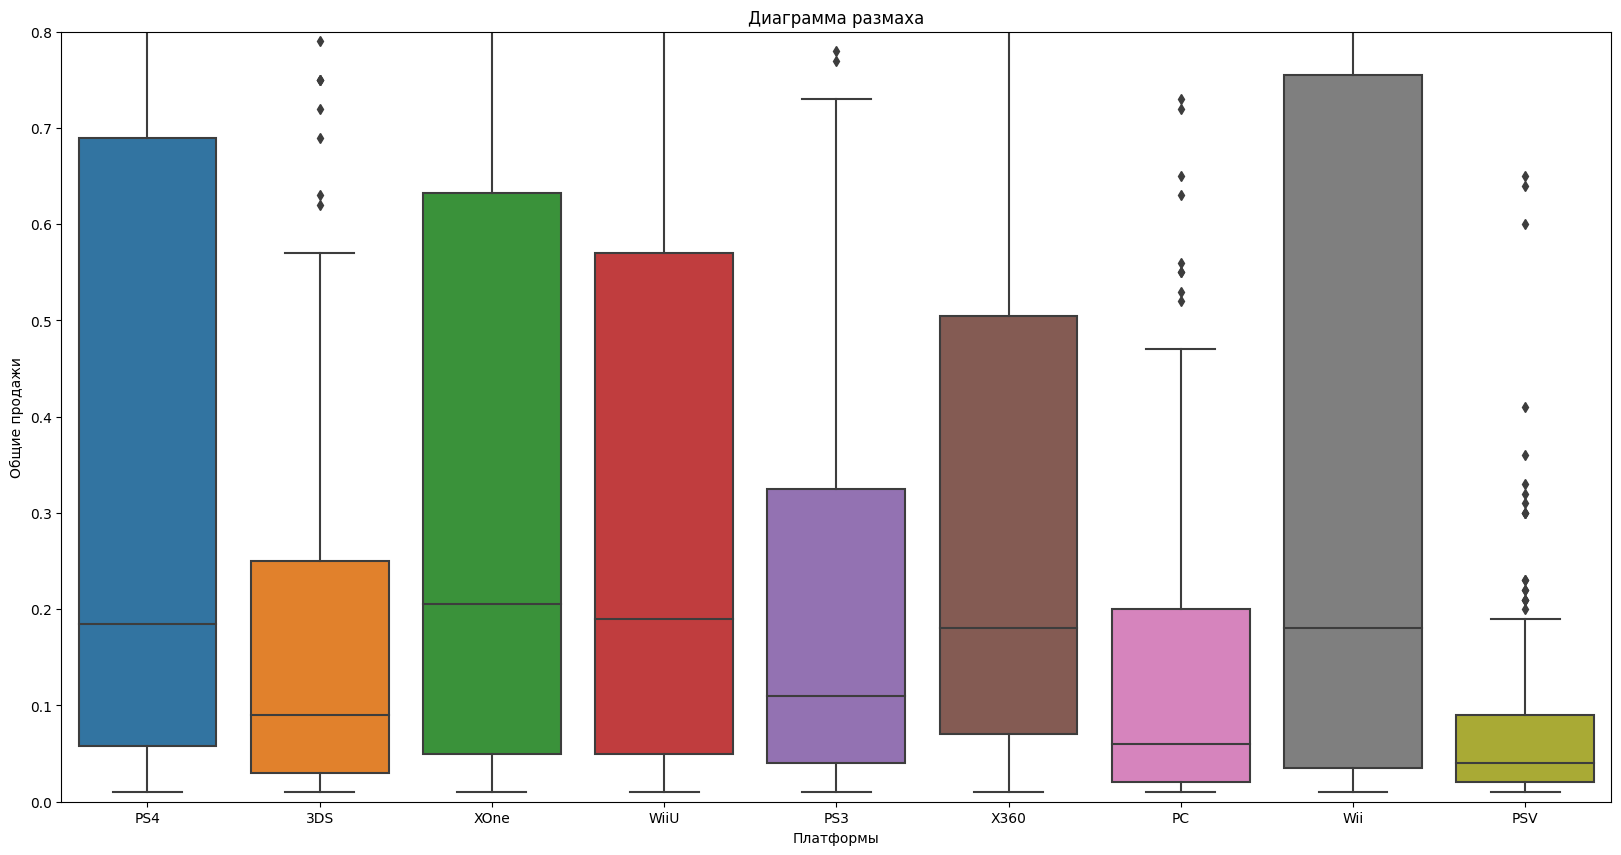

In [45]:
plt.figure(figsize=(20, 10))
box = sns.boxplot(x='platform', y='total_sales', data=data_new).set(title = 'Диаграмма размаха', xlabel = 'Платформы', \
    ylabel = 'Общие продажи', ylim=(0, 0.8))

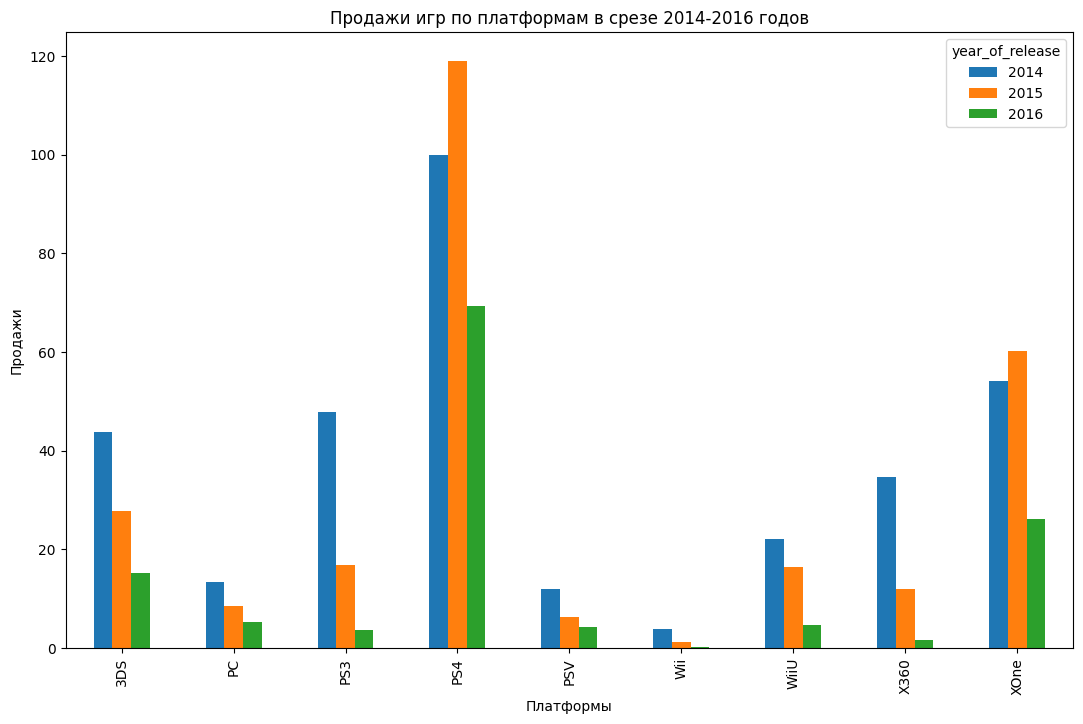

In [46]:
data_new.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum').\
plot(kind='bar', figsize=(13, 8))
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.title('Продажи игр по платформам в срезе 2014-2016 годов')
plt.show()

In [47]:
data_new.query('platform == "PS4"')['total_sales'].describe()

count   376.00
mean      0.77
std       1.61
min       0.01
25%       0.06
50%       0.18
75%       0.69
max      14.63
Name: total_sales, dtype: float64

In [48]:
data_new.query('platform == "Wii"')['total_sales'].describe()

count   11.00
mean     0.46
std      0.63
min      0.01
25%      0.04
50%      0.18
75%      0.76
max      2.01
Name: total_sales, dtype: float64

**Графики выше представлены за последние 3 года (с учётом неполного 2016 года).**

**Диаграмма размаха показывает данные в достаточно специфическом представлении. Например, можно сделать выводы о том, что наиболее продаваемыми (исходя из сравнения медианных значений) являются компьютерные игры для платформ PS4, XOne (новые платформы в ТОП-3), WiiU, Wii и X360 (старые платформы). Платформа Wii выглядит даже конкурентно на фоне новых платформ PS4 и XOne - ведь половина игр на данных платформах были реализованы в количестве 0.18 млн копий. Но по факту, в диаграмме размаха не отражается количество выпущенных игр для каждой платформы. Например, для PS4 с 2014 по 2016 годы было выпущено 376 компьютерных игр, в то время как для Wii всего 11 игр за тот же период. Разница очевидна. Кроме того, в диаграмме размаха в качестве выбросов указаны игры с многомилионными продажами (вероятнее всего, ожидаемые и прорекламированные игры для захода новых платформ на рынок). Таким образом, для целей бизнес-планирования целесообразнее операться на данные по количеству реализованных копий игр в срезе платформ по годам. Т.е., основной упор в маркетинговой компании должен быть сделан на новые платформы PS4 и XOne, возможно, небольшую часть ресурсов можно направить на платформу 3DS, замыкающую ТОП-3. Оставшиеся платформы, вероятнее всего, завершают свой жизненный цикл и в краткосрочной/среднесрочной перспективе могут покинуть рынок.**

### 4.5. Изучение влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков. Построение диаграммы рассеяния и расчёт корреляции между отзывами и продажами.

**Данный анализ предлагается сделать на платформе X360, т.к. данная платформа является 2-ой по продаваемости игр за всё время, плюс X360 вышла на рынок в 2005 году и к 2016 году постепенно завершает свой жизненный цикл. Т.е., данная платформа является успешным бизнес-продуктом.**

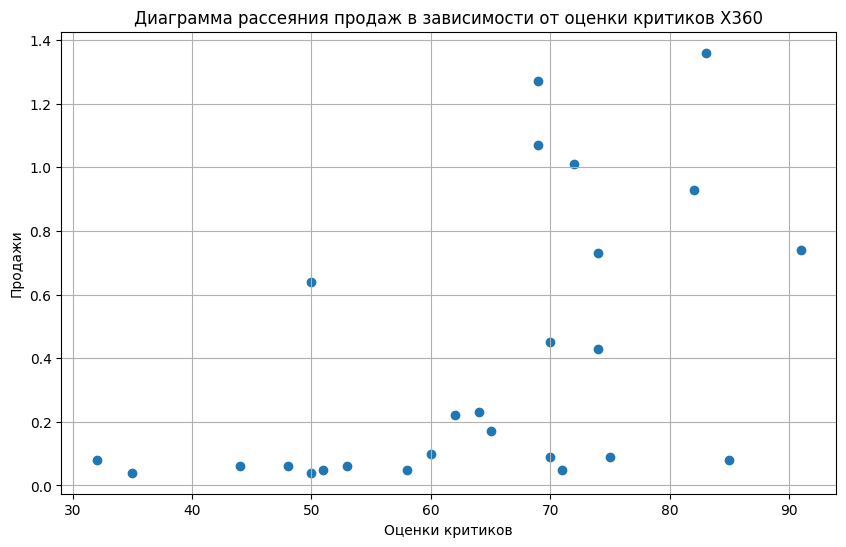

In [49]:
plt.figure(figsize=(10,6))
plt.scatter('critic_score', 'total_sales', data= \
            data_new.query('platform == "X360"').loc[:, ['critic_score', 'user_score', 'total_sales']])
plt.title('Диаграмма рассеяния продаж в зависимости от оценки критиков X360')
plt.ylabel('Продажи')
plt.xlabel('Оценки критиков')
plt.grid()
plt.show()

In [50]:
data_x360 = data_new.query('platform == "X360"').loc[:, ['critic_score', 'user_score', 'total_sales']]
data_x360['critic_score'].corr(data_x360['total_sales'])

0.5257228356581523

**Между оценками критиков и продажами прослеживается некоторая прямая зависимость, коэффициент корреляции составляет 0,52.**

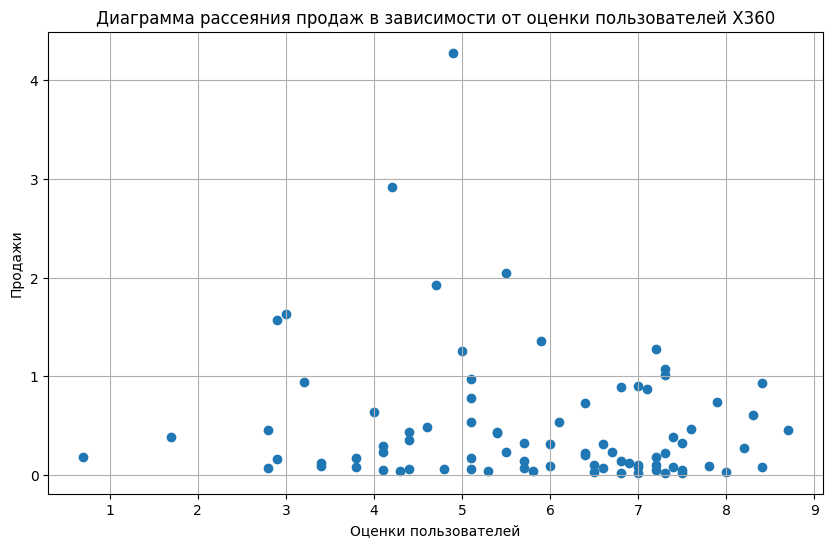

In [51]:
plt.figure(figsize=(10,6))
plt.scatter('user_score', 'total_sales', data= \
            data_new.query('platform == "X360"').loc[:, ['critic_score', 'user_score', 'total_sales']])
plt.title('Диаграмма рассеяния продаж в зависимости от оценки пользователей X360')
plt.ylabel('Продажи')
plt.xlabel('Оценки пользователей')
plt.grid()
plt.show()

In [52]:
data_x360['user_score'].corr(data_x360['total_sales'])

-0.138444570945665

**Между оценками пользователей и продажами нет прямой зависимости, кроме того коэффициент корреляции отрицательный и составляет -0.13.**

**В ТОП-3 продаваемых платформ по итогам нашего исследования (для целей планирования продаж на предстоящий год) вошли PS4, XOne и 3DS. Рассчитаем аналогичные данные и для этих платформ.**

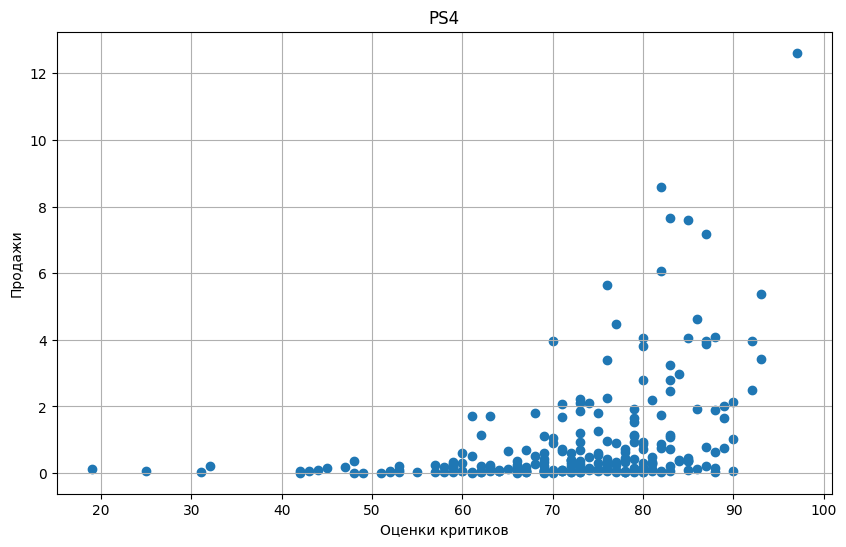

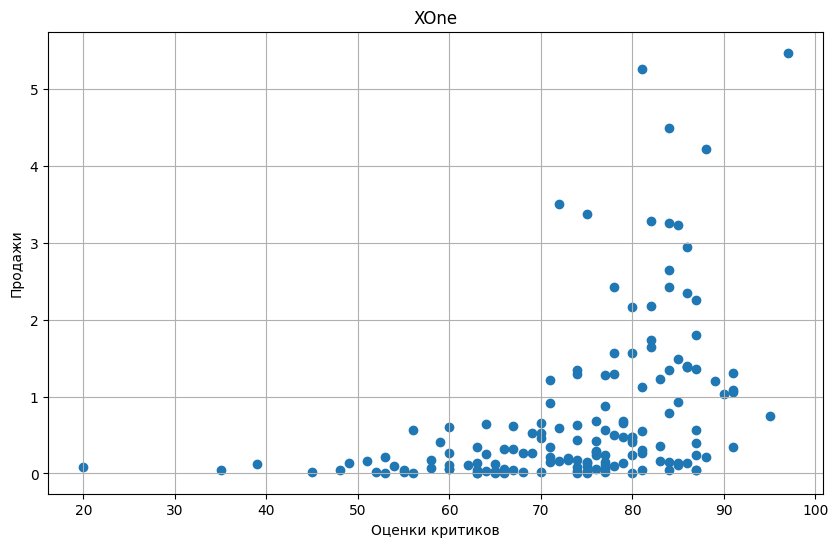

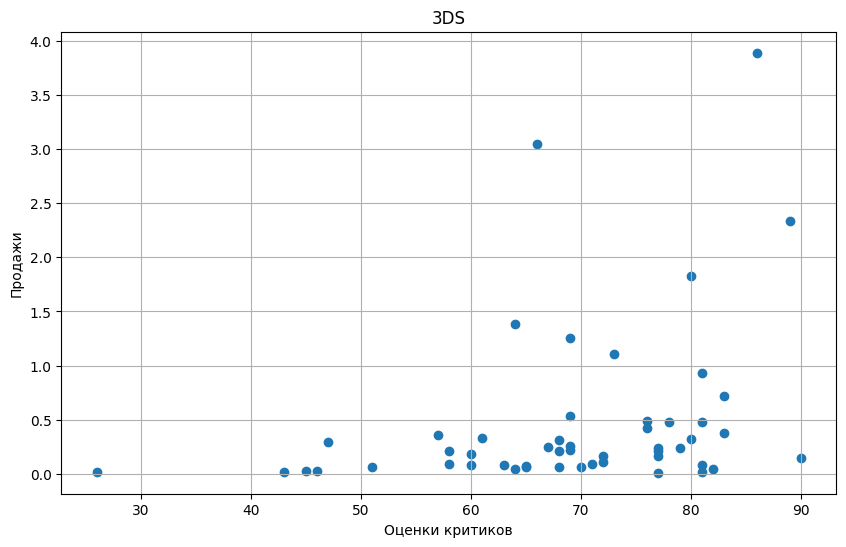

In [53]:
plt_top3 = ['PS4', 'XOne', '3DS']

for elem in plt_top3:
    plt.figure(figsize=(10,6))
    plt.scatter('critic_score', 'total_sales', data= \
            data_new.query('platform == @elem').loc[:, ['critic_score', 'user_score', 'total_sales']])
    plt.title(elem)
    plt.grid()
    plt.xlabel('Оценки критиков')
    plt.ylabel('Продажи')
    plt.show()

In [54]:
plt_top3 = ['PS4', 'XOne', '3DS']

for elem in plt_top3:
    print('Коэффициент корреляции между продажами и оценкой критиков для', elem)
    data_top3 = data_new.query('platform == @elem').loc[:, ['critic_score', 'user_score', 'total_sales']]
    print(data_top3['critic_score'].corr(data_top3['total_sales']))
    print()

Коэффициент корреляции между продажами и оценкой критиков для PS4
0.4026614106810409

Коэффициент корреляции между продажами и оценкой критиков для XOne
0.42867694370333187

Коэффициент корреляции между продажами и оценкой критиков для 3DS
0.314117492869051



**Касательно диаграммы рассеяния и коэффициента корреляции для продаж и оценки критиков - по ТОП-3 платформам, в целом, похожая динамика с X360. Продажи имеют некоторую прямую зависимость от оценки критиков. Единственное отличие, у ТОП-3 платформ коэффициент корреляции несколько ниже, чем у X360 (0.52). Соответственно, 0.40 у PS4, 0.42 у XOne и 0.31 у 3DS.**

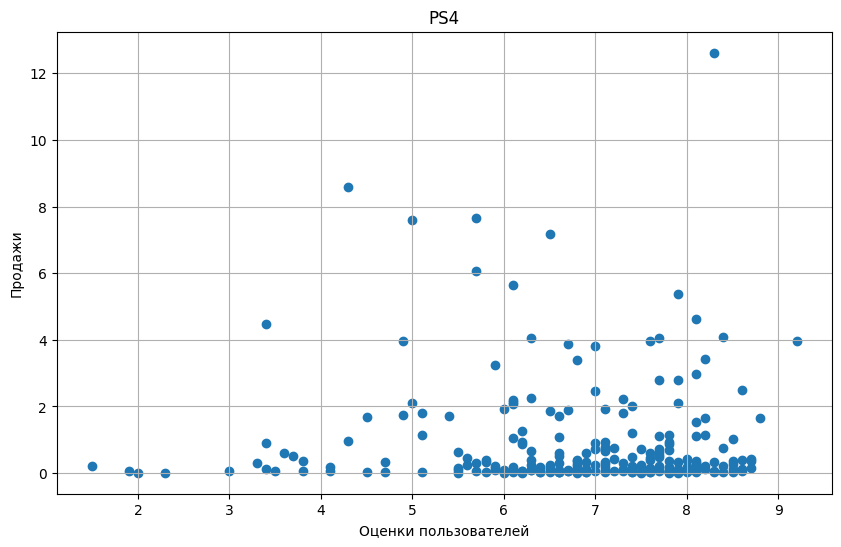

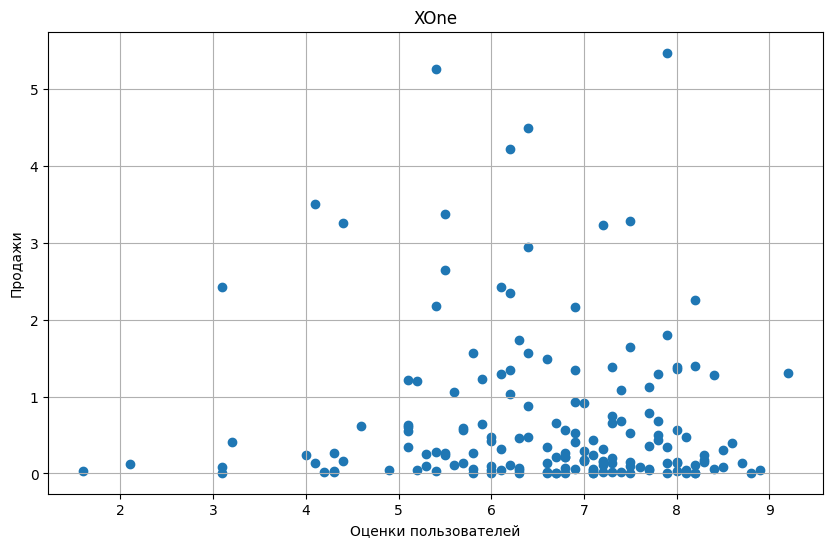

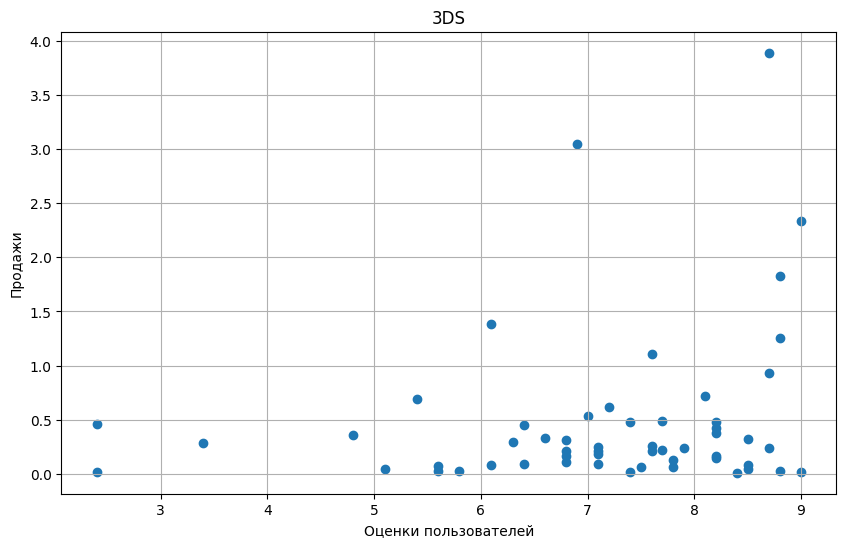

In [55]:
plt_top3 = ['PS4', 'XOne', '3DS']

for elem in plt_top3:
    plt.figure(figsize=(10,6))
    plt.scatter('user_score', 'total_sales', data= \
            data_new.query('platform == @elem').loc[:, ['critic_score', 'user_score', 'total_sales']])
    plt.title(elem)
    plt.grid()
    plt.xlabel('Оценки пользователей')
    plt.ylabel('Продажи')
    plt.show()

In [56]:
plt_top3 = ['PS4', 'XOne', '3DS']

for elem in plt_top3:
    print('Коэффициент корреляции между продажами и оценкой пользователей для', elem)
    data_top3 = data_new.query('platform == @elem').loc[:, ['critic_score', 'user_score', 'total_sales']]
    print(data_top3['user_score'].corr(data_top3['total_sales']))
    print()

Коэффициент корреляции между продажами и оценкой пользователей для PS4
-0.04013158947269733

Коэффициент корреляции между продажами и оценкой пользователей для XOne
-0.07038392806475809

Коэффициент корреляции между продажами и оценкой пользователей для 3DS
0.2151932718527028



**Касательно диаграммы рассеяния и коэффициента корреляции для продаж и оценки пользователей - по ТОП-3 платформам, в целом, похожая динамика с X360 (за исключением платформы 3DS). Оценки пользователей не имеют прямой взаимосвязи с продажами, коэффициент корреляции отрицательный, стремящийся к 0. У X360 коэффициент корреляции -0.13, у PS4 -0.04, у XOne -0.07. Отличительный результат показала только платформа 3DS, у которой коэффициент корреляции составил 0.21. Для сравнения: коэффициент корреляции продаж от оценок критиков у платформы 3DS составил 0.31. В целом, как уже было сказано выше, оценки критиков демонстрируют прямую, средне-слабую корреляцию с числом продаж. Оценки пользователей корреляции с продажами не имеют. Даже для платформы DS, положительная корреляция 0.21 свидетельствует только о слабой положительной корреляции.**     

### 4.6. Общее распределение игр по жанрам. Самые прибыльные жанры? Жанры с высокими и низкими продажами.

In [57]:
data_new.groupby('genre')['total_sales'].median().sort_values(ascending=False) #исправлено на медиану

genre
Shooter        0.52
Sports         0.19
Platform       0.14
Fighting       0.12
Role-Playing   0.11
Simulation     0.10
Action         0.09
Misc           0.09
Racing         0.09
Strategy       0.06
Puzzle         0.04
Adventure      0.03
Name: total_sales, dtype: float64

**Самый популярный жанр - шуттер, имеет значительный отрыв от других жанров по медианным продажам. Если определять ТОП-5 популярных жанров, то на втором месте спортивные игры, на третье месте жанр платформер, далее файтинг, и замыкает ТОП-5 ролевые игры.**

## 5. Составление портрета пользователя каждого региона.

### 5.1. Определение самых популярных платформ (ТОП-5) для пользователей каждого региона (NA, EU, JP).

In [58]:
NA_top_plt = data_new.groupby('platform').agg({'NA_sales' : 'sum'}).sort_values(by='NA_sales', ascending=False).reset_index()

NA_top_plt['ratio'] = NA_top_plt['NA_sales'] / NA_top_plt['NA_sales'].sum() * 100
NA_top_plt.loc['other'] = NA_top_plt.loc[5:].sum(axis=0)
NA_top_plt = NA_top_plt.drop(index=[5,6,7,8]).reset_index(drop=True)
NA_top_plt.loc[5, 'platform'] = 'other 4'
NA_top_plt

,platform,NA_sales,ratio
0,PS4,98.61,34.71
1,XOne,81.27,28.61
2,X360,28.30,9.96
3,3DS,22.64,7.97
4,PS3,22.05,7.76
5,other 4,31.19,10.98


In [59]:
EU_top_plt = data_new.groupby('platform').agg({'EU_sales' : 'sum'}).sort_values(by='EU_sales', ascending=False).reset_index()

EU_top_plt['ratio'] = EU_top_plt['EU_sales'] / EU_top_plt['EU_sales'].sum() * 100
EU_top_plt.loc['other'] = EU_top_plt.loc[5:].sum(axis=0)
EU_top_plt = EU_top_plt.drop(index=[5,6,7,8]).reset_index(drop=True)
EU_top_plt.loc[5, 'platform'] = 'other 4'
EU_top_plt

,platform,EU_sales,ratio
0,PS4,130.04,48.04
1,XOne,46.25,17.09
2,PS3,25.54,9.44
3,PC,17.97,6.64
4,3DS,16.12,5.96
5,other 4,34.76,12.84


In [60]:
JP_top_plt = data_new.groupby('platform').agg({'JP_sales' : 'sum'}).sort_values(by='JP_sales', ascending=False).reset_index()

JP_top_plt['ratio'] = JP_top_plt['JP_sales'] / JP_top_plt['JP_sales'].sum() * 100
JP_top_plt.loc['other'] = JP_top_plt.loc[5:].sum(axis=0)
JP_top_plt = JP_top_plt.drop(index=[5,6,7,8]).reset_index(drop=True)
JP_top_plt.loc[5, 'platform'] = 'other 4'
JP_top_plt

,platform,JP_sales,ratio
0,3DS,44.24,47.71
1,PS4,15.02,16.20
2,PSV,14.54,15.68
3,PS3,11.22,12.10
4,WiiU,7.31,7.88
5,other 4,0.40,0.43


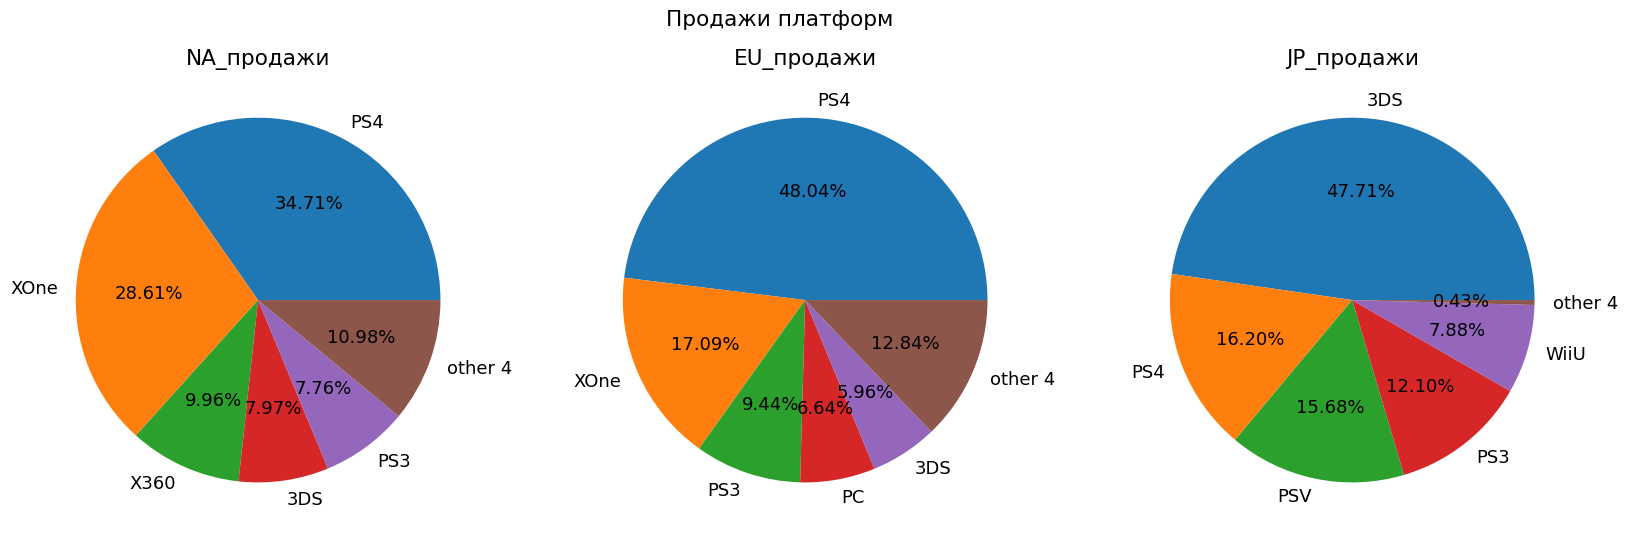

In [61]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
matplotlib.rcParams.update({'font.size': 13})
fig.suptitle('Продажи платформ')

ax1.pie(NA_top_plt['NA_sales'], labels= NA_top_plt['platform'], autopct = '%.2f%%')
ax1.set_title('NA_продажи')

ax2.pie(EU_top_plt['EU_sales'], labels=EU_top_plt['platform'], autopct = '%.2f%%')
ax2.set_title('EU_продажи')

ax3.pie(JP_top_plt['JP_sales'], labels=JP_top_plt['platform'], autopct = '%.2f%%')
ax3.set_title('JP_продажи');

**ТОП-5 платформ для разных регионов различаются. И если в Америке и Европе ТОП-платформы хотя бы пересекаются, и первые две позиции занимают платформы PS4 и XOne, то в Японии ТОП-платформы представлены совершенно другой структурой - первое место занимает платформа 3DS, второе (с существенным отрывом от первого) PS4, а XOne вообще не представлен на рынке Японии. Так же отличается доля, суммарно занимаемая платформами, не вошедшими в ТОП-5. В Америке и Европе на эти платформы приходится ~ 11-13%, а в Японии такие платформы даже не превышают 1 процента от доли рынка.**

### 5.2. Определение самых популярных жанров (ТОП-5) для пользователей каждого региона (NA, EU, JP).

In [62]:
NA_top_genre = data_new.groupby('genre').agg({'NA_sales':'sum'}).sort_values(by='NA_sales', ascending=False).reset_index()

NA_top_genre['ratio'] = NA_top_genre['NA_sales'] / NA_top_genre['NA_sales'].sum() * 100
NA_top_genre.loc['other'] = NA_top_genre.loc[5:].sum(axis=0)
NA_top_genre = NA_top_genre.drop(index=[5,6,7,8,9,10,11]).reset_index(drop=True)
NA_top_genre.loc[5, 'genre'] = 'other'
NA_top_genre

,genre,NA_sales,ratio
0,Shooter,79.02,27.82
1,Action,72.53,25.53
2,Sports,46.13,16.24
3,Role-Playing,33.47,11.78
4,Misc,15.05,5.30
5,other,37.86,13.33


In [63]:
EU_top_genre = data_new.groupby('genre').agg({'EU_sales':'sum'}).sort_values(by='EU_sales', ascending=False).reset_index()

EU_top_genre['ratio'] = EU_top_genre['EU_sales'] / EU_top_genre['EU_sales'].sum() * 100
EU_top_genre.loc['other'] = EU_top_genre.loc[5:].sum(axis=0)
EU_top_genre = EU_top_genre.drop(index=[5,6,7,8,9,10,11]).reset_index(drop=True)
EU_top_genre.loc[5, 'genre'] = 'other'
EU_top_genre

,genre,EU_sales,ratio
0,Action,74.68,27.59
1,Shooter,65.52,24.21
2,Sports,45.73,16.89
3,Role-Playing,28.17,10.41
4,Racing,14.13,5.22
5,other,42.45,15.68


In [64]:
JP_top_genre = data_new.groupby('genre').agg({'JP_sales':'sum'}).sort_values(by='JP_sales', ascending=False).reset_index()

JP_top_genre['ratio'] = JP_top_genre['JP_sales'] / JP_top_genre['JP_sales'].sum() * 100
JP_top_genre.loc['other'] = JP_top_genre.loc[5:].sum(axis=0)
JP_top_genre = JP_top_genre.drop(index=[5,6,7,8,9,10,11]).reset_index(drop=True)
JP_top_genre.loc[5, 'genre'] = 'other'
JP_top_genre

,genre,JP_sales,ratio
0,Role-Playing,31.16,33.60
1,Action,29.38,31.68
2,Fighting,6.37,6.87
3,Misc,5.59,6.03
4,Shooter,4.87,5.25
5,other,15.36,16.56


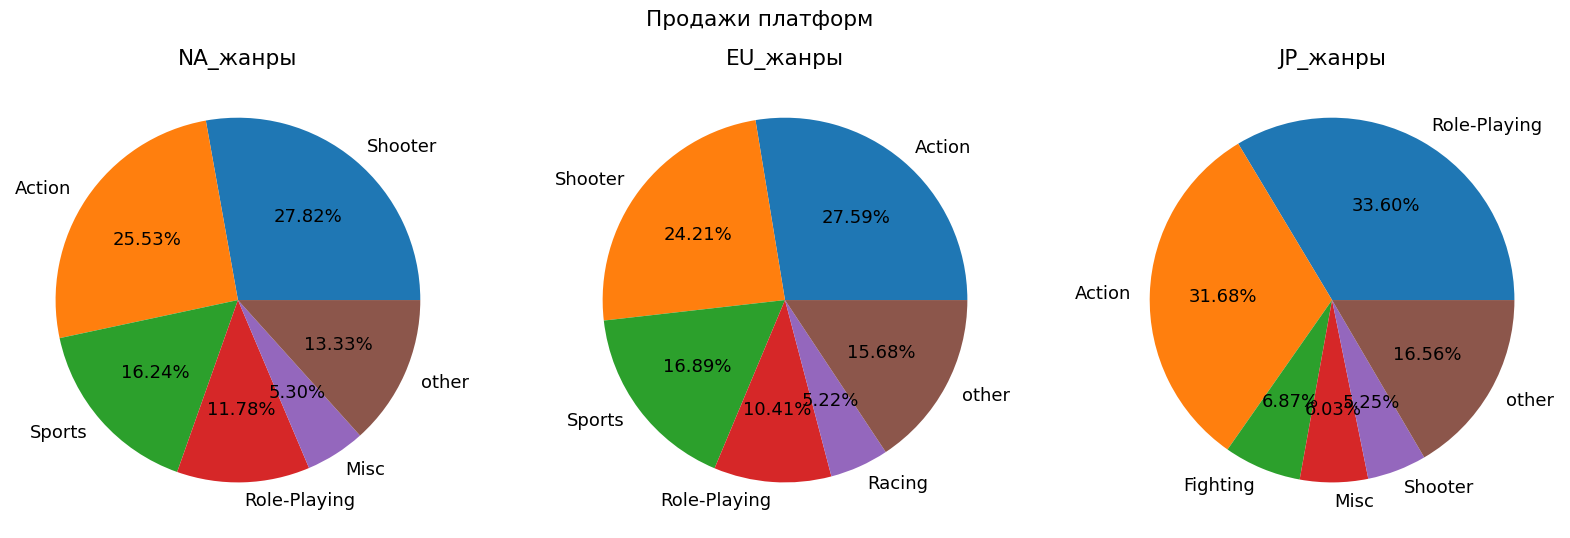

In [65]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
matplotlib.rcParams.update({'font.size': 13})
fig.suptitle('Продажи платформ')

ax1.pie(NA_top_genre['NA_sales'], labels= NA_top_genre['genre'], autopct = '%.2f%%')
ax1.set_title('NA_жанры')

ax2.pie(EU_top_genre['EU_sales'], labels=EU_top_genre['genre'], autopct = '%.2f%%')
ax2.set_title('EU_жанры')

ax3.pie(JP_top_genre['JP_sales'], labels=JP_top_genre['genre'], autopct = '%.2f%%')
ax3.set_title('JP_жанры');

**ТОП-5 жанров для разных регионов также различаются. В Америке и Европе жанры пересекаются. Лидер рынка (с существенным отрывом) - шуттеры, на втором месте платформеры. Также в ТОП-5 жанров по этим регионам вошли спортивные игры и гонки. Различается 1 жанр, в Америке в ТОП-5 вошёл жанр файтинг, а в Европе симуляторы. В Японии структура жанров другая. Первое место в ТОП-5 занимают ролевые игры, второе файтинги. Далее, с третьего по пятое место - жанры паззлы, музыка, экшен, которые не вошли в ТОП-5 на рынках Америки и Европы.**

### 5.3. Изучение влияния рейтинга ESRB на продажи в отдельном регионе.

**По информации википедии:**

**Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.**

**Для определения рейтинга издатель присылает в ESRB видеоролик, который содержит наиболее впечатляющие и резкие сцены игры. Также издатель заполняет специальную анкету сведениями о содержании игры. На веб-сайте ESRB сообщается, что затем рецензенты независимо оценивают продукт и определяют рейтинг.**

**Когда игра готова к продаже, издатель отправляет копии финальной версии в ESRB. Подвергается осмотру упаковка игры, а предоставленные издателем сведения о содержании игры обычно проверяются путём её тестирования. Если игра оказывается более жёсткой, чем было представлено в видеоролике, или покупатели высказываются о несоответствии рейтинга и содержимого продукта, к издателю могут быть применены различные санкции.**

In [66]:
data_new['rating'].unique()

array(['NO rating', 'M', 'E', 'T', 'E10+'], dtype=object)

**Указанные уникальные значения - это различные категории рейтинга ESRB.**

**M (Mature) - Для взрослых. Возрастное ограничение 17+**

**E(Everyone) - Для всех возрастов.** 

**T(Teen) - Для подростков. Возврастное ограничение 13+**

**E10+(Everyone 10 and older) - Для всех от 10 лет и старше.**

**Значением "NO rating" были обработаны пропуски в данном столбце. Это значит, что такие игры не имеют рейтинга ESRB.**

In [67]:
NA_esrb = data_new.groupby('rating').agg({'NA_sales' : 'sum'}).sort_values(by='NA_sales', ascending=False).reset_index()
NA_esrb['ratio'] = NA_esrb['NA_sales'] / NA_esrb['NA_sales'].sum() * 100
NA_esrb

,rating,NA_sales,ratio
0,M,96.42,33.94
1,NO rating,64.72,22.78
2,E,50.74,17.86
3,T,38.95,13.71
4,E10+,33.23,11.70


In [68]:
EU_esrb = data_new.groupby('rating').agg({'EU_sales' : 'sum'}).sort_values(by='EU_sales', ascending=False).reset_index()
EU_esrb['ratio'] = EU_esrb['EU_sales'] / EU_esrb['EU_sales'].sum() * 100
EU_esrb

,rating,EU_sales,ratio
0,M,93.44,34.52
1,NO rating,58.95,21.78
2,E,58.06,21.45
3,T,34.07,12.59
4,E10+,26.16,9.66


In [69]:
JP_esrb = data_new.groupby('rating').agg({'JP_sales' : 'sum'}).sort_values(by='JP_sales', ascending=False).reset_index()
JP_esrb['ratio'] = JP_esrb['JP_sales'] / JP_esrb['JP_sales'].sum() * 100
JP_esrb

,rating,JP_sales,ratio
0,NO rating,56.54,60.97
1,T,14.78,15.94
2,E,8.94,9.64
3,M,8.01,8.64
4,E10+,4.46,4.81


 **Продажи также различаются в зависимости от рейтинга для разных регионов. В Америке и Европе структура продажи игр в зависимости от рейтинга практически одинаковая - порядка 34% игр имеют рейтинг M, затем ~21% игр не имеют рейтинга (вероятно, они были оценены другим рейтинговым агентством), далее ~18-22% игр имеют рейтинг Е, четвёртое место занимают игры с рейтингом Т, и последнее место (10-12%) приходится на рейтинг Е10+. Для Японии, традиционно, картина другая. На первом месте игры без рейтинга (самая существенная доля рынка - 61%), на втором месте игры с рейтингом Т (16%), на третьем с рейтингом Е, на четвёртом -  М и на последнем Е10+. Очевидно, что в Японии большинство продаваемых игр не имеет рейтинга ESRB. Может быть это объясняется тем, что в отличии от Америки и Европы, в Японии платформой-лидером по реализации игр является 3DS, в ТОП-5 по Японии также входят платформы PSV и WiiU (которые не попали в ТОП-5 платформ для рынков Америки и Европы). Возможно, игры для данных платформ имеют другую рейтинговую оценку. По информации из интернета, в Японии действует рейтинговое агентво CERO, вероятно, для выхода на рынок Японии производители получают рейтинг этого агентства.**

## 6. Проверка гипотез.

### 6.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Для первого утверждения зададим следующие гипотезы:**

**H0 : cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

**H1 : cредние пользовательские рейтинги платформ Xbox One и PC разные (не равны).**

**Используем метод ttest_ind, т.к. рассматриваем гипотезу о равенстве средних двух независимых друг от друга генеральных совокупностей. Тест двусторонний, т.к. рассматривается вопрос о равенстве средних. Примем alpha = 0.05.**

In [70]:
array1 = data_new.query('platform == "XOne"').dropna(subset=['user_score'])['user_score']
array2 = data_new.query('platform == "PC"').dropna(subset=['user_score'])['user_score']

alpha = 0.05

results = st.ttest_ind(array1, array2)  #по умолчанию дисперсии равны
print('p-значение:', results.pvalue/2)

if results.pvalue/2 < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.05225253959674207
Не получилось отвергнуть нулевую гипотезу


**По результатам статистического теста не получилось отвергнуть нулевую гипотезу (которая звучит так - H0: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые). Таким образом, у нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются.**

### 6.2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 

**Для второго утверждения зададим следующие гипотезы:**

**Н0 : средние пользовательские рейтинги жанров Action и Sports одинаковые.**

**Н1 : средние пользовательские рейтинги жанров Action и Sports разные (не равны).**

**Используем метод ttest_ind, т.к. рассматриваем гипотезу о равенстве средних двух независимых друг от друга генеральных совокупностей. Тест двусторонний, т.к. рассматривается вопрос о равенстве средних. Примем alpha = 0.05.**

In [71]:
array1 = data_new.query('genre == "Action"').dropna(subset=['user_score'])['user_score']
array2 = data_new.query('genre == "Sports"').dropna(subset=['user_score'])['user_score']

alpha = 0.05

results = st.ttest_ind(array1, array2)  #по умолчанию дисперсии равны
print('p-значение:', results.pvalue/2)

if results.pvalue/2 < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.4355573992552932e-19
Отвергаем нулевую гипотезу


**По результатам статистического теста нулевая гипотеза отвергается. Таким образом, нет оснований отвергуть альтернативную гипотезу, которая звучит следующим образом - H1: средние пользовательские рейтинги жанров Action и Sports разные (не равны).**

## 7. Общий вывод.

В ходе исследования была рассмотрена информация об исторических данных по продажам компьютерных игр с 1980 года по 2016 год (неполные данные за 2016г.) - название видеоигр, годов выпуска, платформ, жанров, продаж в млн экземпляров по регионам (Северная Америка, Европа, Японии, остальной мир), суммарные общие продажи, оценки критиков и пользователей, рейтинги ESRB.

Цель проведённого исследования - определить на предстоящий год направление маркетинговой политики (т.е. выявить закономерности, определяющие успешность продажи игр, и, таким образом, предложить платформы и игры, на которые "следует сделать ставку" для целей закупки и последующей реализации игр).

В ходе исследования для проведения анализа и планирования был выбран актуальный период 2014-2016 годов. Это связано с тем, что, во-первых, при бизнес-планировании используются краткосрочные периоды (особенно, если речь идёт о столь быстро меняющейся сфере, как компьютерные игры, что обусловлено достаточно быстрым научно-техническим прогрессом). И, во-вторых, в 2014 году произошла смена ТОП-платформ на рынке. Появившиеся в 2013 году новые платформы PS4 и XOne вытеснили в 2014 году из ТОП-платформ бывших лидеров рынка - PS3 и X360.

Таким образом, последние 2 года (2015 и 2016) в мировой ТОП-3 платформ входят:
- PS4,
- XOne,
- 3DS.

Однако, следует обратить внимание, что в разных регионах структура ТОП-платформ несколько различается (особенно, это касается Японии).

ТОП-5 платформ в Америке:-----------------ТОП-5 платформ в Европе:-----------------ТОП-5 платформ в Японии:
- PS4---------------------------------------------       - PS4-----------------------------------------------   - 3DS
- XOne--------------------------------------------       - XOne----------------------------------------------   - PS4
- X360--------------------------------------------       - PS3-----------------------------------------------   - PSV
- 3DS --------------------------------------------       - PC------------------------------------------------   - PS3
- PS3---------------------------------------------       - 3DS-----------------------------------------------   - WiiU

Жанры компьютерных игр можно классифицировать следующих образом по принципу продаваемости:

ТОП-5 жанров в Америке:-----------------ТОП-5 жанров в Европе:-----------------ТОП-5 жанров в Японии:
- шуттеры -----------------------------------------   - шуттеры ----------------------------------------   - ролевые игры
- платформеры -------------------------------------   - платформеры ------------------------------------   - файтинги
- спорт -------------------------------------------   - гонки ------------------------------------------   - паззлы
- файтинги ----------------------------------------   - спорт ------------------------------------------   - музыка
- гонки--------------------------------------------   - симуляторы -------------------------------------   - экшен

Касательно рейтингов ESRB продаваемость игр распределяется следующим образом (на рынках Америки и Европы данные практически одинаковые):
Рейтинги в Америке:-----------------Рейтинги в Европе:-----------------Рейтинги в Японии:
- M-----------------------------------------   - M -----------------------------------------------   - без рейтинга
- без рейтинга -----------------------------   - без рейтинга ------------------------------------   - T
- E ----------------------------------------   - E -----------------------------------------------   - E
- T ----------------------------------------   - T -----------------------------------------------   - M
- E10+--------------------------------------   - E10+ --------------------------------------------   - E10+


Относительно оценок критиков и пользователей. Исследование показало, что оценки пользователей не имеют прямой зависимости с  продажами. Корреляция между оценками пользателей и продажами отрицательная, стремящаяся к 0. Между оценками критиков и продажами имеется некоторая прямая завимость. Однако, коэффициент корреляции всё равно слабо-умеренный. Игры, получившие хорошие оценки критиков, могут лучше продаваться, однако, сильной прямой зависимости нет. 

**Соответственно, при планировании рекламной компании на 2017 год рекомендуется руководствоваться следующим.**

**1 Вариант. При наличии достаточного финансирования для охвата всех трёх рынков (рекомендация по 1-2 платформам и жанрам, рейтингу).**

**Северная Америка:** платформы **PS4, XOne**, жанры **шуттеры, платформеры**, рейтинги **M, без рейтинга ESRB.**

**Европа:** платформы **PS4, XOne**, жанры **шуттеры, платформеры**, рейтинги **M, без рейтинга ESRB.**

**Япония:** платформы **3DS, PS4**, жанры **ролевые игры, файтинги**, рейтинги **без рейтинга ESRB, T.**

**2 Вариант. При наличии финансирования на 1-2 рынка.**

**В таких условиях следует отдать предпочтение рынкам Северной Америки и Европы. Рынок Японии, во-первых, очень специфичен, во-вторых, менее прибылен, чем другие 2 рынка. Если речь идёт о необходимости выбрать 1 рынок, то следует отдать предпочтение Северной Америке, т.к. по объёму продаж компьютерных игр Северная Америка незначительно, но опережает Европу.**

**Рекомендация:**

**Северная Америка:** платформы **PS4, XOne**, жанры **шуттеры, платформеры**, рейтинги **M, без рейтинга ESRB.**